Stochastic Volatility Model
- Practical data indicate volatility is variable and unpredictable 
- Volatility can be recognized as mean-reverting square-root process
- Return distribution under stochastic volatility model exibit fatter tailsthan log-normal counterparts

Heston Model

$$
dS_{t} = rS_{t} dt + \sqrt{v_{t}}S_{t}dW_{1t}
$$
$$
dv_{t} = \kappa (\bar{v} - v_{t})dt + \gamma \sqrt{v_{t}}dW_{2t}
$$

- Correlation between $dW_{1t}dW_{2t} = \rho dt$, usually the correlation is negative
- Parameter:
  - $\kappa >= 0 $ is speed of mean reverting 
  - $\bar{v} >= 0 $ is long-term mean of variance
  - $\gamma > 0 $ is volatility of volatility


Variance process is also called CIR(Cox-Ingersoll-Ross) stochastic process
- $dv_{t} = \kappa (\bar{v} - v_{t})dt + \gamma \sqrt{v_{t}}dW_{2t}$
- For a given time t > 0, the distribution of v_{t} is a constant $\bar{c_{t}}$ times a noncentral chi-squared random variable
  - i.e $$v_{t} \sim \bar{c_{t}}  {\chi}^2(\bar{d},\bar{\lambda_{t}}) $$
  - with $\bar{c_{t}} = \frac{1}{4\kappa} {\gamma}^2(1 - \exp{(-\kappa t)})$, $\bar{d} = \frac{4\kappa\bar{v}}{\gamma^2}$, $\bar{\lambda_{t}} = \frac{4\kappa v_{0}\exp(-\kappa t)}{\gamma^2(1 - \exp{(-\kappa t)})}$
  - In order to precludes negative values, Feller condition : $2 \kappa \bar{v} \ge \gamma^2$

Generate correlated brownian motion
- For correlated brownian motion, $E[W_{it},W_{jt}] = \rho_{i,j}t$, if $i \ne j$ and $E[W_{it},W_{jt}] = t$, if $i = j$
- Similarly, for correlated brownian increments, $dW_{it}dW_{jt}=\rho_{i,j}dt$

Use cholesky deomposition to correlate brownian motion, 2 algo lead to the same result
1. Generate uncorrelated random variables,use cholesky matrix to correlate random variables, cum sum random variables
2. Generate uncorrelated random variables, cum sum random variables and get 2 uncorrelated brownian motion. Use cholesky matrix to correlated 2 brownian motion.

In [6]:
## generate uncorrelated random variables
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import copy

np.random.seed(100)
rho = 0.6
corr = np.array([[1,rho],[rho,1]])
chol = np.linalg.cholesky(corr)
T = 1
Nsteps = 10000
dt = T / Nsteps

random = np.random.randn(Nsteps,2)
print('corr(random) = {}'.format(np.corrcoef(random[:,0],random[:,1])[0,1]))

corr(random) = 0.0030789109060191007


Before correlation, corr(Z1,Z2) = 0.0030789109060191007
After correlation, corr(Z1,Z2) = 0.601277377889004
corr(W1,W2) = 0.757678978312658


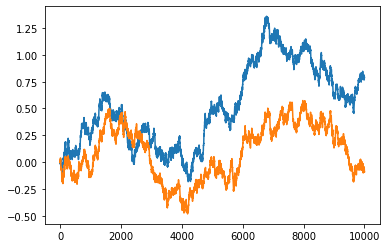

In [7]:
## Algo1
Z1 = copy.deepcopy(random[:,0].reshape(1,Nsteps))
Z2 = copy.deepcopy(random[:,1].reshape(1,Nsteps))
print('Before correlation, corr(Z1,Z2) = {}'.format(np.corrcoef(Z1,Z2)[0,1]))

W1 = np.zeros([1, Nsteps+1])
W2 = np.zeros([1, Nsteps+1])


for i in range(0,Nsteps):
    # Correlate noises
    Z2[:,i]= rho * Z1[:,i] + np.sqrt(1.0 - rho**2) * Z2[:,i]
    
    W1[:,i+1] = W1[:,i] + np.power(dt, 0.5)*Z1[:,i]
    W2[:,i+1] = W2[:,i] + np.power(dt, 0.5)*Z2[:,i]

print('After correlation, corr(Z1,Z2) = {}'.format(np.corrcoef(Z1,Z2)[0,1]))

plt.plot(W1.T)
plt.plot(W2.T)
print('corr(W1,W2) = {}'.format(np.corrcoef(W1,W2)[0,1]))


corr(x1,x2) = -0.20942200046682827
corr(y1,y2) = 0.7577035481247227


Text(0.5, 1.0, 'After correlation')

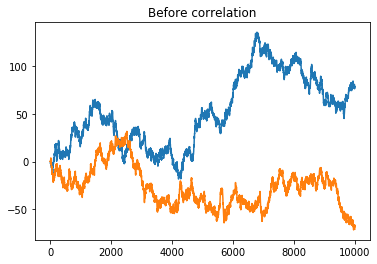

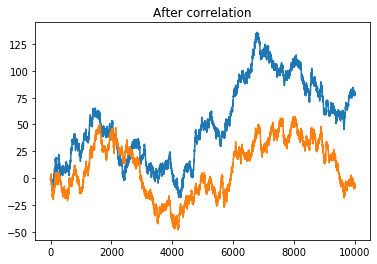

In [8]:
## Algo2
X = copy.deepcopy(random)
X = X.cumsum(axis = 0)
x1 = X[:,0]
x2 = X[:,1]

print('corr(x1,x2) = {}'.format(np.corrcoef(x1,x2)[0,1]))
plt.figure(1)
plt.plot(x1)
plt.plot(x2)
plt.title("Before correlation")

Y = (chol @ X.T).T
y1 = Y[:,0]
y2 = Y[:,1]
print('corr(y1,y2) = {}'.format(np.corrcoef(y1,y2)[0,1]))
plt.figure(2)
plt.plot(y1)
plt.plot(y2)
plt.title("After correlation")

Generating correlated shocks
Generating volatility process
Generating GBM
40
1 trials, trial = 0.9333016995738437
2 trials, trial = 0.7607303951746829
3 trials, trial = 0.7416162530981093
4 trials, trial = 0.7412693149349648
5 trials, trial = 0.7412691966296402
Get root after 5 iterations
41
1 trials, trial = 0.9062036897575285
2 trials, trial = 0.7515339032897902
3 trials, trial = 0.73600261109558
4 trials, trial = 0.7357797966103024
Get root after 4 iterations
42
1 trials, trial = 0.8824150918182677
2 trials, trial = 0.7433803287660985
3 trials, trial = 0.7307919715244938
4 trials, trial = 0.7306499615400158
Get root after 4 iterations
43
1 trials, trial = 0.8613125292173782
2 trials, trial = 0.7360667552547882
3 trials, trial = 0.7258888477946019
4 trials, trial = 0.7257989783076059
Get root after 4 iterations
44
1 trials, trial = 0.8426719602568034
2 trials, trial = 0.7295638726062357
3 trials, trial = 0.7213460376881803
4 trials, trial = 0.7212894570230972
Get root after 4 iterati

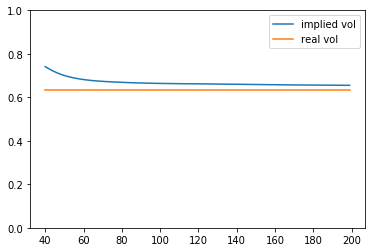

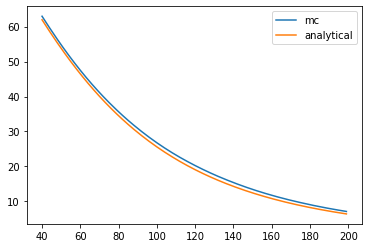

In [19]:


import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

def newton_solver(f,df,x,tol = 1e-6,max_loop = 1000,return_list = False):
    root_trials = []
    if abs(f(x)) <= tol:
        return x
    loop = 0
    while abs(f(x))> tol and loop < max_loop:
        if abs(df(x)) < tol:
            print('The slope of function @ {} is 0'.format(x))
            return None
        x = x - float(f(x)/df(x))
        root_trials.append(x)
        loop += 1
        print('{} trials, trial = {}'.format(loop,x))
    
    if loop >= max_loop:
        print('No solution!')
        return None
    print('Get root after {} iterations'.format(loop))
    if return_list:
        return root_trials[-1],root_trials
    else:          
        return root_trials[-1]
    
def dV_dsigma(S_0,K,sigma,tau,r):
    #parameters and value of Vega
    d2   = (np.log(S_0 / float(K)) + (r - 0.5 * np.power(sigma,2.0)) * tau) / float(sigma * np.sqrt(tau))
    value = K * np.exp(-r * tau) * st.norm.pdf(d2) * np.sqrt(tau)
    return value

def BS_Call_Option_Price(CP,S_0,K,sigma,tau,r):
    #Black-Scholes Call option price
    d1    = (np.log(S_0 / float(K)) + (r + 0.5 * np.power(sigma,2.0)) * tau) / float(sigma * np.sqrt(tau))
    d2    = d1 - sigma * np.sqrt(tau)
    if str(CP).lower()=="c" or str(CP).lower()=="1":
        value = st.norm.cdf(d1) * S_0 - st.norm.cdf(d2) * K * np.exp(-r * tau)
    elif str(CP).lower()=="p" or str(CP).lower()=="-1":
        value = st.norm.cdf(-d2) * K * np.exp(-r * tau) - st.norm.cdf(-d1)*S_0
    return value

def impliedVol_calculator(CP,S_0,K,tau,r,market_price,sigmaini = 0.5,):
    optPrice = lambda sigma:BS_Call_Option_Price(CP,S_0,K,sigma,tau,r) ## option price wrt sigma
    vega = lambda sigma:dV_dsigma(S_0,K,sigma,tau,r) # vega wrt sigma

    fx = lambda sigma:optPrice(sigma) - market_price
    dfx_dx = vega

    result = newton_solver(fx,dfx_dx,sigmaini,tol = 1e-6,max_loop = 1000,return_list = False)
    return result

def correlated_shock(NPath,Nsteps,rho):
    random1 = np.random.randn(NPath,Nsteps)
    
    random2 = np.random.randn(NPath,Nsteps)
    if rho != 0:
        for i in range(NPath):
            random2[i] = rho * random1[i] + np.sqrt(1.0 - rho**2) * random2[i]
    return random1,random2

def generate_CIR_process(NPath,Nsteps,dt,kappa,gamma,v0,v_bar,random):
    V = np.zeros([NPath,Nsteps + 1])
    V[:,0] = v0
    for i in range(Nsteps):
        dV = kappa * (v_bar - V[:,i]) + gamma * np.sqrt(V[:,i]) * random[:,i] * np.sqrt(dt)
        V[:,i + 1] = V[:,i ] + dV
    return V

def generate_heston_process(NPath,Nsteps,dt,kappa,gamma,v0,v_bar,s0,rho):
    print("Generating correlated shocks")
    random1,random2 = correlated_shock(NPath,Nsteps,rho)
    print("Generating volatility process")
    V = generate_CIR_process(NPath,Nsteps,dt,kappa,gamma,v0,v_bar,random1)
    # generate GBM process
    print("Generating GBM")
    S = np.zeros([NPath,Nsteps + 1])
    S[:,0] = np.log(s0)
    
    for i in range(Nsteps):
        dy = (r - 0.5 * V[:,i]) *dt + np.sqrt(V[:,i]) * random2[:,i] *  np.sqrt(dt)
        S[:,i + 1] = S[:,i ] + dy
    S = np.exp(S)
    return {'volatility':V,
            'price':S}

T = 1
Nsteps = 1000
NPath = 10000
dt = T / Nsteps
rho = -0.9
corr = np.full((2, 2), rho)
np.fill_diagonal(corr,1)
chol = np.linalg.cholesky(corr)

s0 = 100
k = 100
r = 0.02

kappa = 1
v0 = 0.4
v_bar = 0.4
gamma = np.sqrt(2 * kappa * v_bar)


implied_volatilities = []
Ks = []
mc_price = []
ana_price = []


result = generate_heston_process(NPath,Nsteps,dt,kappa,gamma,v0,v_bar,s0,rho)
pricePath = result['price']
volPath = result['volatility']
for k in range(40,200):
    print(k)
    
    prices = np.exp(-r * T) * np.maximum(pricePath[:,-1] - k  ,0)
    
    mc_price.append(np.mean(prices))
    ana_price.append(BS_Call_Option_Price('C',s0,k,np.sqrt(v0),T,r))
    np.std(prices)
    
    iv = impliedVol_calculator('C',s0,k,T,r,np.mean(prices),sigmaini = 0.5,)
    implied_volatilities.append(iv)
    Ks.append(k)
    
plt.figure(1)
plt.plot(Ks,implied_volatilities,label = 'implied vol')
plt.plot(Ks,[np.sqrt(v_bar)] * len(implied_volatilities),label = 'real vol')
plt.ylim((0,1))
plt.legend()

plt.figure(2)
plt.plot(Ks,mc_price,label = 'mc')
plt.plot(Ks,ana_price,label = 'analytical')
plt.legend()




### Based on simulated heston model process, we could observe the implied volatility smile(a little bit